In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

In [2]:
from unicodedata import normalize, decomposition, category
from fusus.lakhnawi import Lakhnawi, pprint
Lw = Lakhnawi()
Lw.setStyle()

Here is the original of line 1 on page 101:

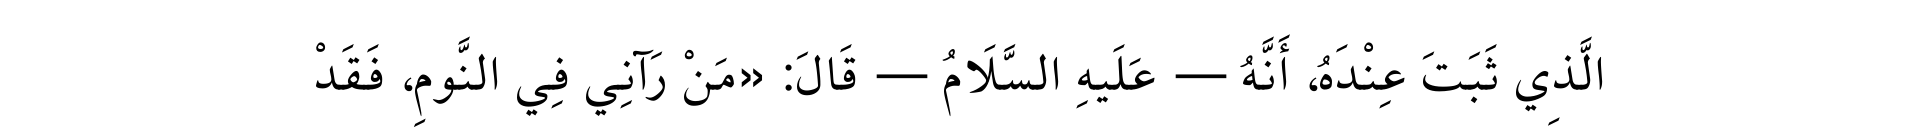

In [3]:
testPages = "101"
Lw.drawPages(testPages, clip=(79, 114))

## Attempt 1

```
def tweakSpace(c, dc):
    # return c.strip() if ISOLATED in dc else (" " + c.strip()) if INITIAL in dc else c
    return c
    # return c.strip()
```

We just use the result of unicode normalization. The `c` is the result of a `normalize("NFKC", x)`.

This will lead to an unwanted space in the first word.

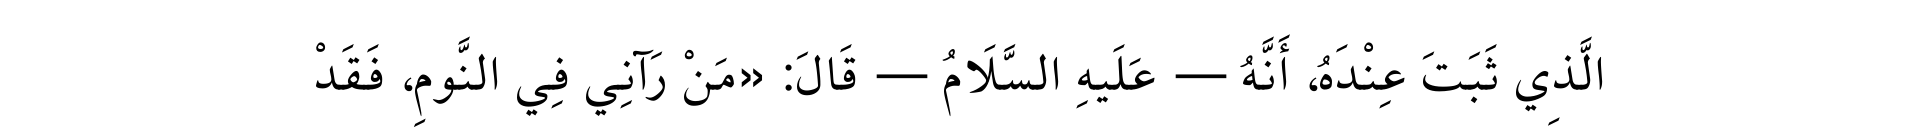

	   1 (page  101)


In [4]:
Lw.drawPages(testPages, clip=(79, 114))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=1)

Drill down to the first word:

In [5]:
Lw.showLines(testPages, line=1, start=1, end=6)

## Attempt 2

```
def tweakSpace(c, dc):
    # return c.strip() if ISOLATED in dc else (" " + c.strip()) if INITIAL in dc else c
    # return c
    return c.strip()
```

We use the result of unicode normalization but remove any initial/final whitespace from it.

This will lead to an unwanted space in the first word.

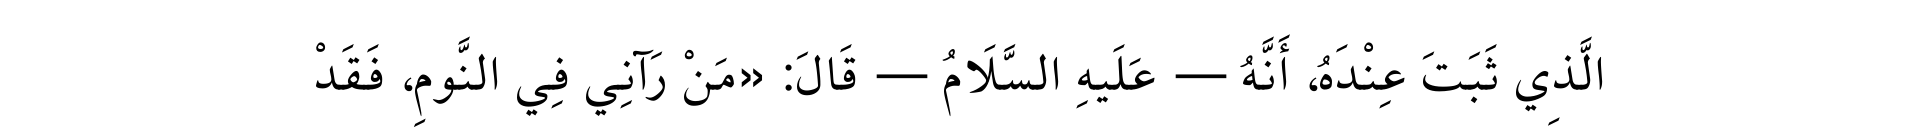

	   1 (page  101)


In [6]:
Lw.drawPages(testPages, clip=(79, 114))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=1)

Drill down to the first word:

In [7]:
Lw.showLines(testPages, line=1, start=1, end=6)

The whole line looks correct now.

Let's check the other lines:

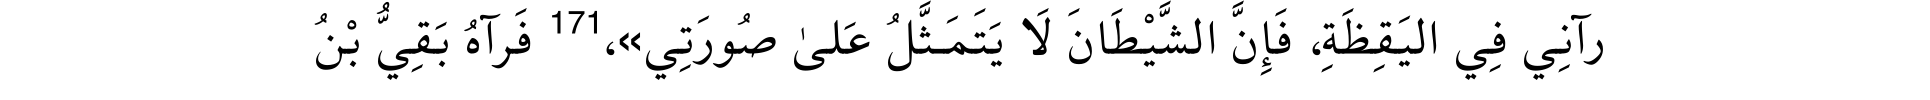

	   1 (page  101)


In [8]:
Lw.drawPages(testPages, clip=(114, 139))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=2)

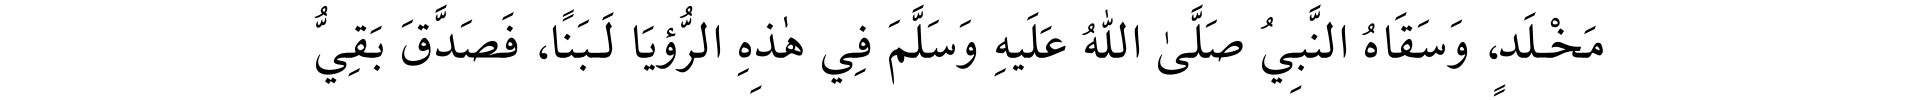

	   1 (page  101)


In [9]:
Lw.drawPages(testPages, clip=(139, 164))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=3)

An other page

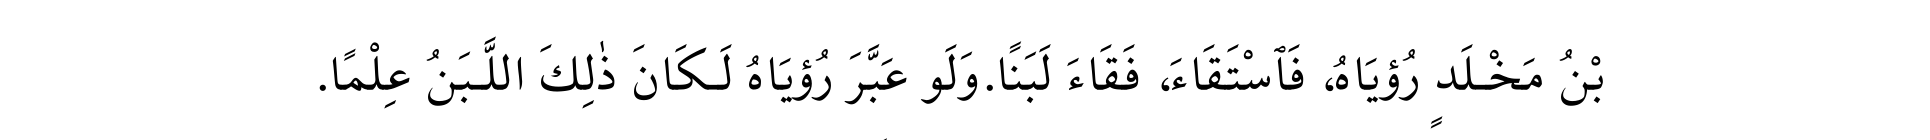

	   1 (page  102)


In [28]:
testPages = "102"
Lw.drawPages(testPages, clip = (79, 114))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=1)

There are too few spaces, especially after alefs.

In [11]:
Lw.showLines(testPages, line=1, start=60, end=64)

In [12]:
Lw.showString("ﺎ")

In [13]:
Lw.getPages(testPages)

	   1 (page  102)


In [14]:
Lw.showLines(testPages, line=2, start=56, end=64)

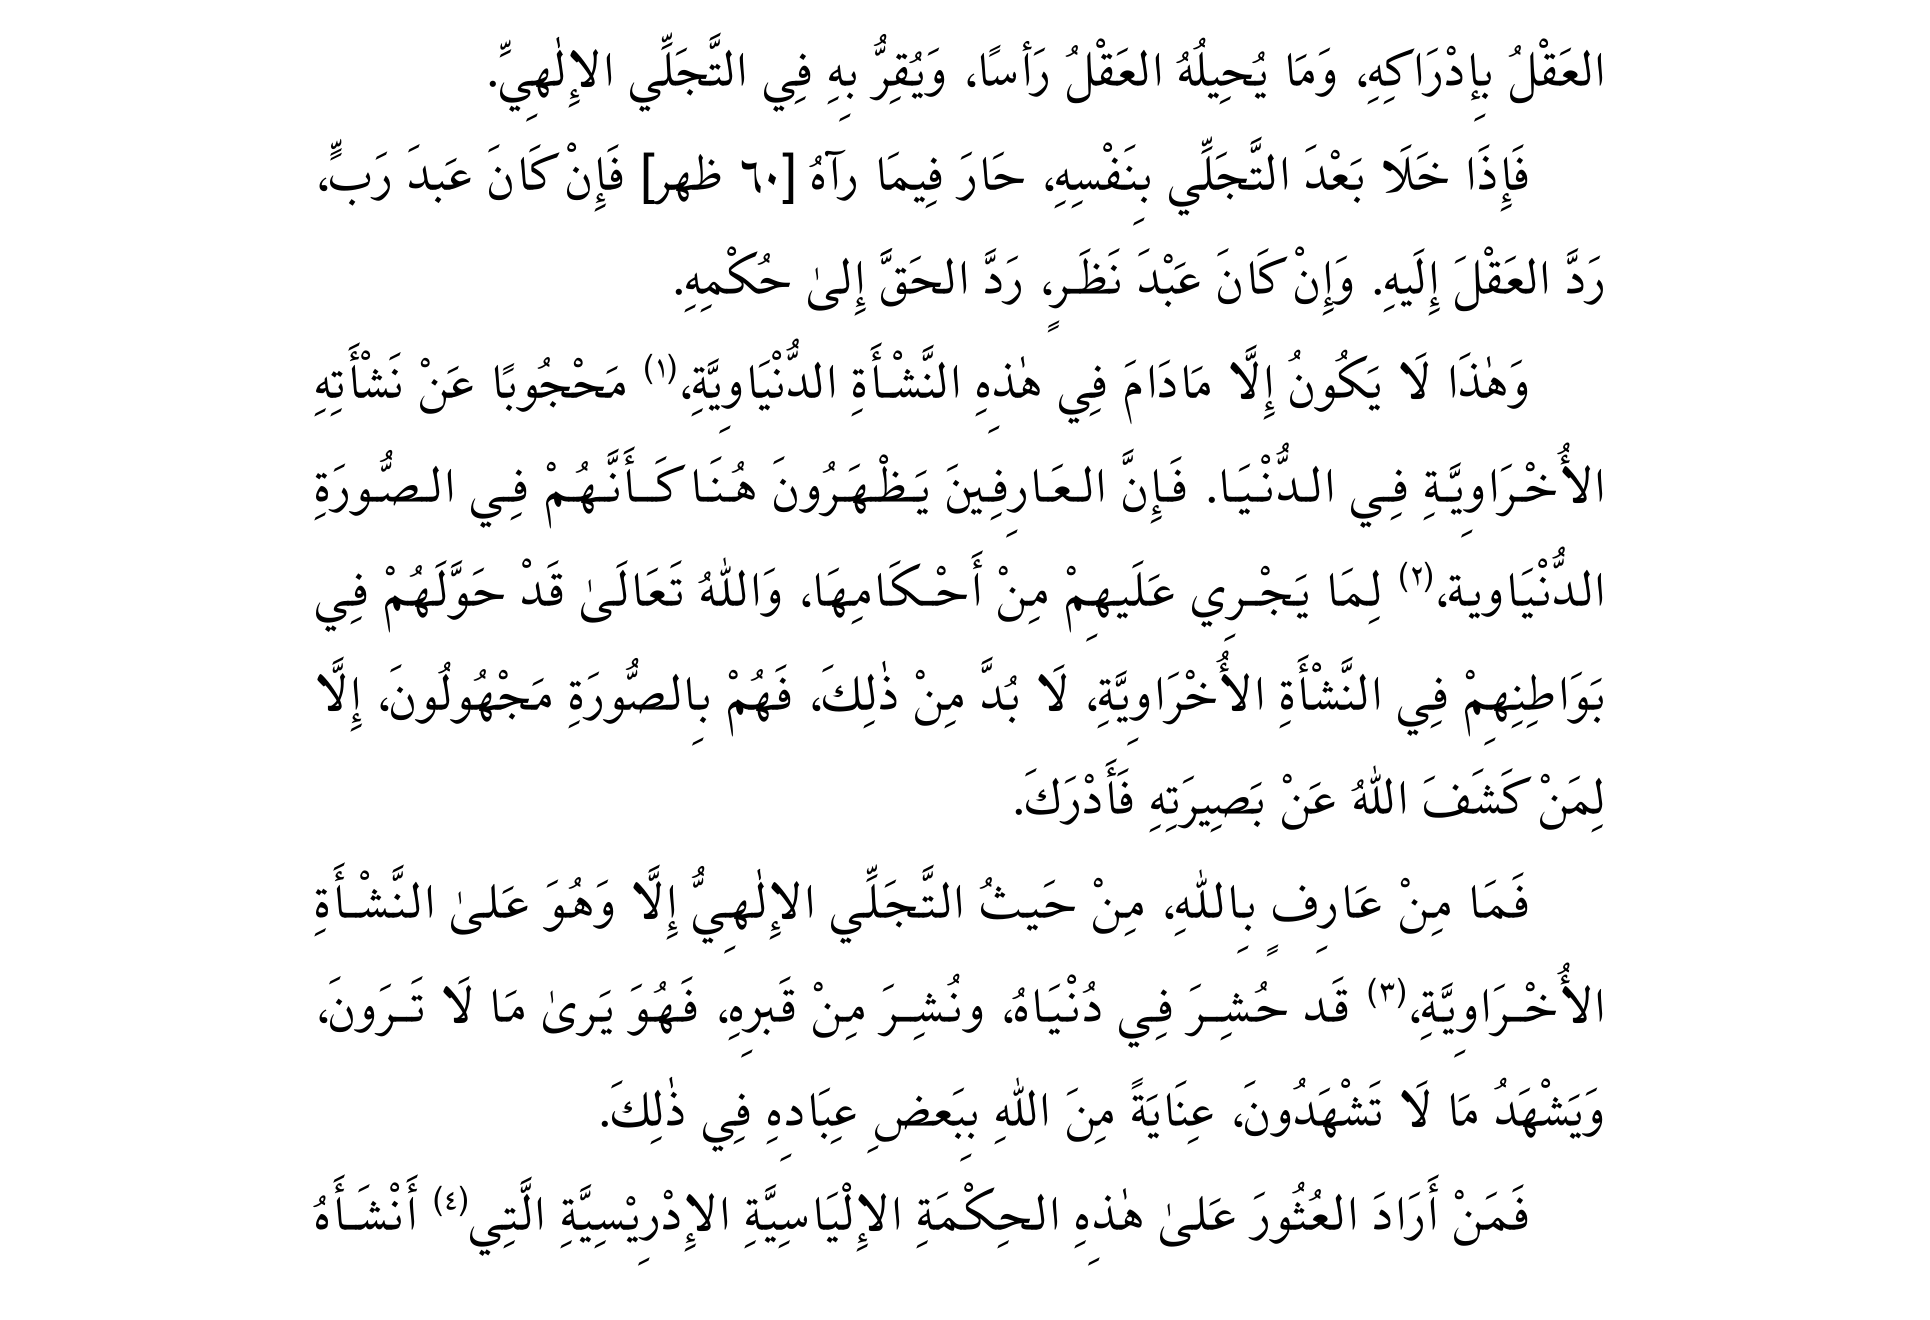

	   1 (page  322)



In [70]:
testPages = "322"
Lw.drawPages(testPages, clip = (80, 410))
Lw.getPages(testPages)
Lw.htmlPages(testPages)

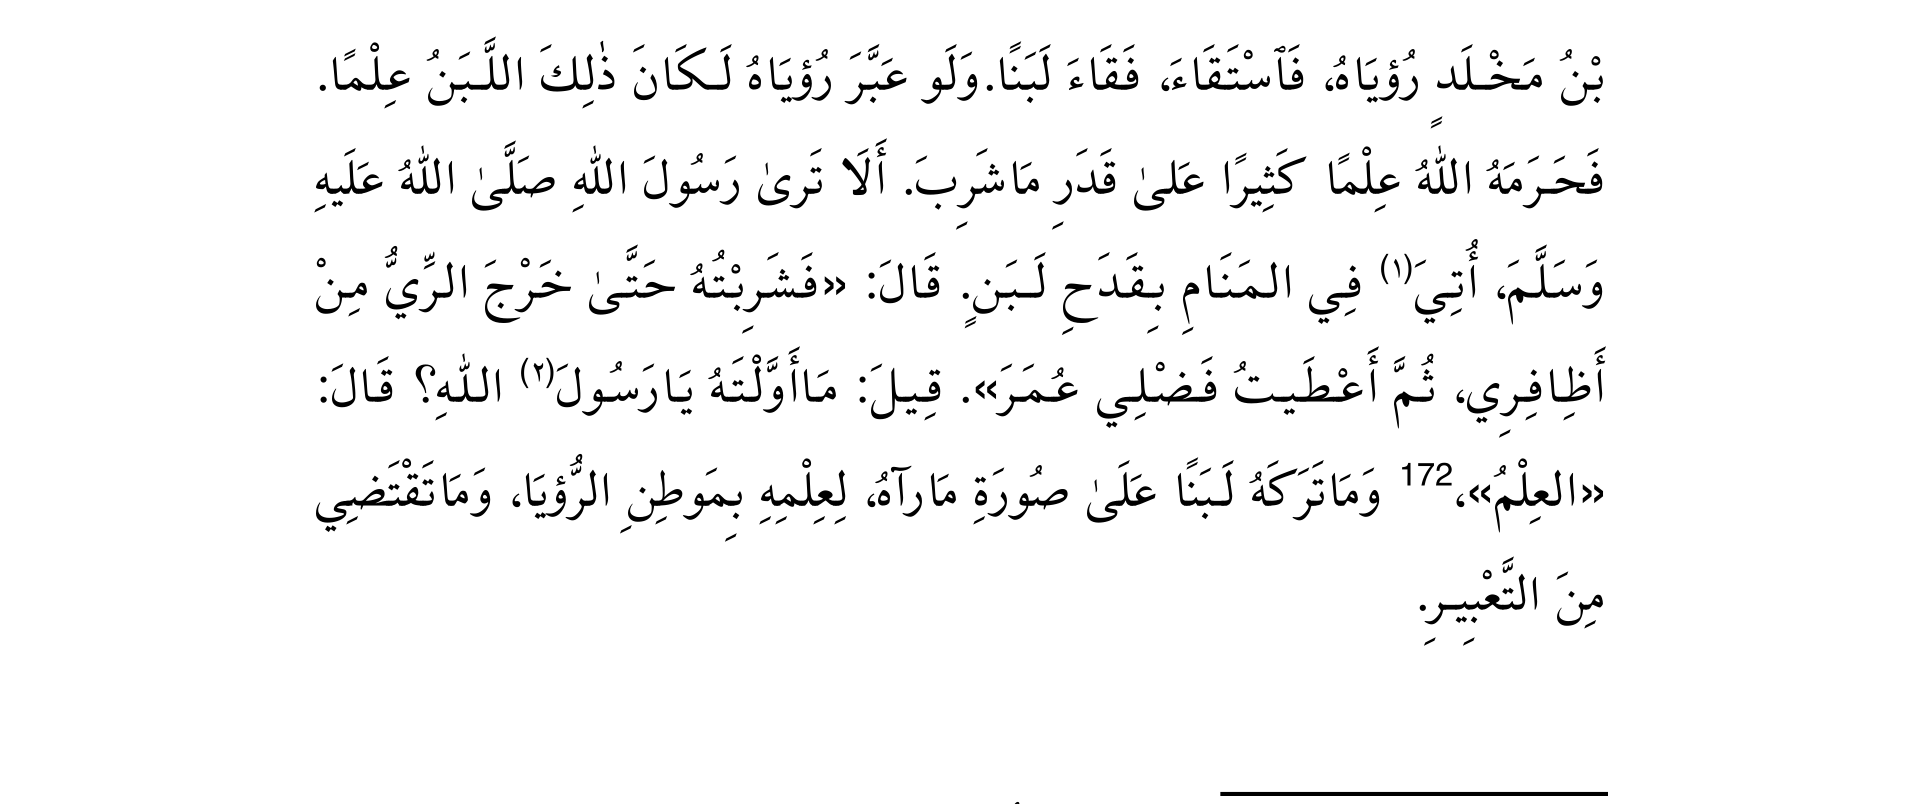

	   1 (page  102)



In [62]:
testPages = "102"
Lw.drawPages(testPages, clip = (79, 280))
Lw.getPages(testPages)
Lw.htmlPages(testPages)

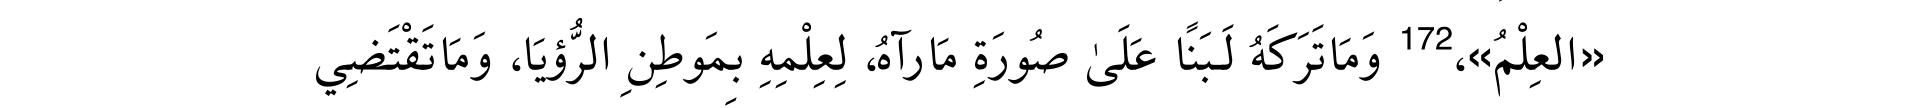

	   1 (page  102)
106 x='و' curLen=0 isAFinal=False
107 x='َ' curLen=1 isAFinal=False
108 x='م' curLen=1 isAFinal=False
109 x='َ' curLen=2 isAFinal=False



isAFinal=True
110 x='ا' curLen=2 isAFinal=True
x='ا' curLen=3 up='ARABIC LETTER MEEM'


112 x='ت' curLen=0 isAFinal=False
113 x='َ' curLen=1 isAFinal=False



In [60]:
testPages = "102"
Lw.drawPages(testPages, clip = (188, 215))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=5)
Lw.showLines(testPages, line=5, start=106, end=112)

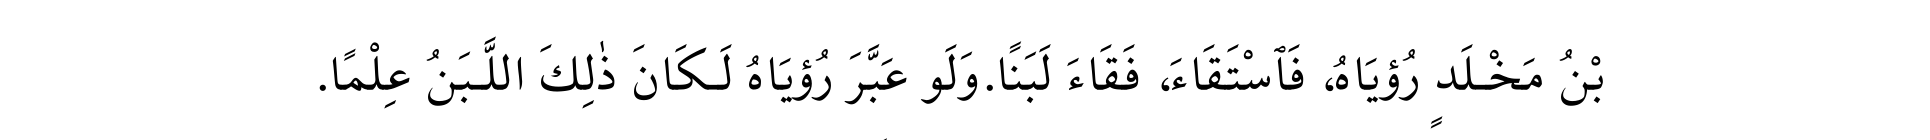

	   1 (page  102)


In [17]:
testPages = "102"
Lw.drawPages(testPages, clip = (79, 114))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=1)
Lw.showLines(testPages, line=1, start=80)

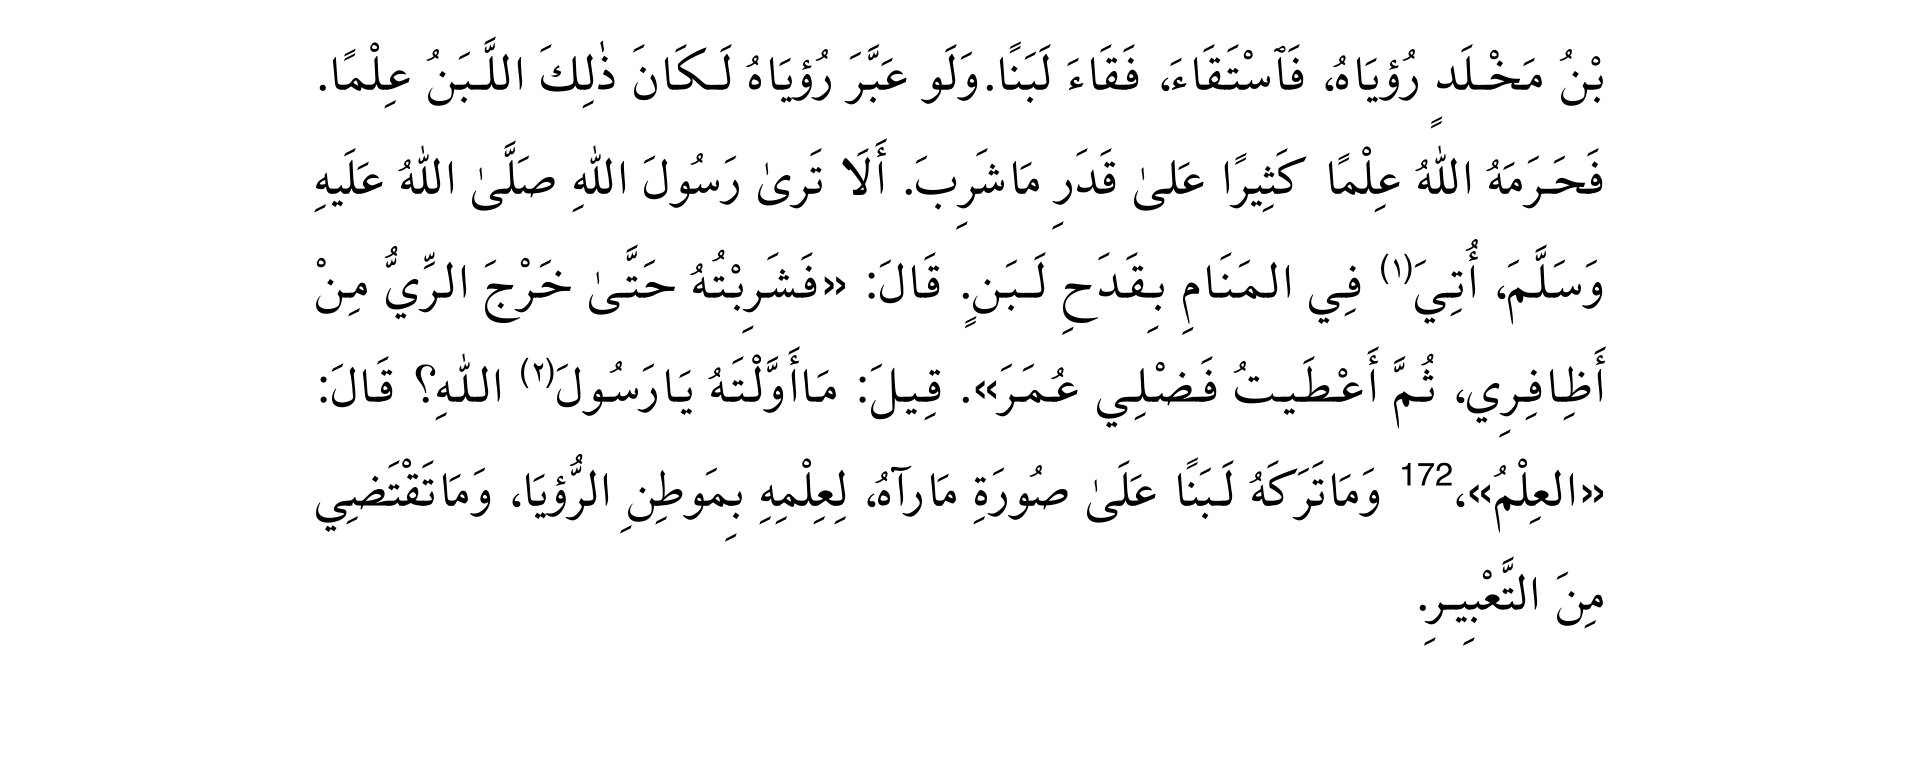

	   1 (page  102)


page 102
	line  3
		  2 ]==[ 0
		  5 ]==[ 12
		  8 ]==[ 12
		 11 ]  [ 69
		 13 ]==[ 0
		 16 ]==[ 12
		 18 ]==[ 0
		 19 ]==[ 0
		 20 ]==[ 0
		 21 ]  [ 34
		 24 ]==[ 12
		 25 ]  [ 34
		 26 ]==[ 0
		 28 ]==[ 12
		 31 ]==[ 12
		 34 ]==[ 12
		 35 ]==[ 0
		 37 ]  [ 34
		 40 ]==[ 12
		 43 ]==[ 12
		 45 ]==[ 0
		 47 ]  [ 34
		 50 ]==[ 12
		 51 ]==[ 0
		 54 ]==[ 12
		 56 ]==[ 0
		 57 ]  [ 34
		 60 ]==[ 12
		 61 ]==[ 0
		 63 ]==[ 0
		 64 ]  [ 34
		 65 ]==[ 0
		 68 ]==[ 12
		 71 ]==[ 12
		 73 ]==[ 0
		 76 ]==[ 12
		 79 ]==[ 12
		 81 ]  [ 34
		 84 ]==[ 12
		 87 ]==[ 12
		 88 ]  [ 34
		 91 ]==[ 12
		 93 ]==[ 0
		 95 ]  [ 34
		 96 ]==[ 0
		 98 ]==[ 12
		100 ]==[ 0
		102 ]  [ 34
		105 ]==[ 12


In [18]:
testPages = "102"
Lw.drawPages(testPages, clip=(79, 270))
Lw.getPages(testPages)
Lw.htmlPages(testPages, line=3)
# Lw.showLines(testPages, line=1, start=80)
Lw.showSpacing(testPages, line=3)
Lw.showLines(testPages, line=3, start=1, end=16)

In [19]:
Lw.getPages(testPages)
Lw.showLines(testPages, line=1, start=42, end=46)

	   1 (page  102)


## Appendix

In [20]:
ZWJ = "\u200d"
ZWNJ = "\u200c"
x = "\u0631\u064e\u0622{}\u0646\u0650\u064a "

for inter in ("", " ", ZWJ, ZWNJ):
    print(f"{inter=}")
    Lw.showString(x.format(inter))

inter=''


inter=' '


inter='\u200d'


inter='\u200c'


In [21]:
from unicodedata import normalize, decomposition, name as uname

In [22]:
yehIsol = "\ufef1"
yehFinal = "\ufef2"
yehInit = "\ufef3"
fc60 = "\ufc60"
alefFinal = "\ufe8e"

for c in (yehIsol, yehFinal, yehInit, alefFinal, fc60):
    print(decomposition(c))
    Lw.showString(normalize("NFKC", c))

<isolated> 064A


<final> 064A


<initial> 064A


<final> 0627


<isolated> 0020 064E 0651


In [23]:
decomposition(yehInit)

'<initial> 064A'

In [24]:
uname(yehInit)

'ARABIC LETTER YEH INITIAL FORM'

In [25]:
x = normalize("NFKC", "\ufc60")

In [26]:
Lw.showString(x)